# FORCASTING US-HTG EXCHANGE RATE IN HAITI IN A CONTEXT OF CRISES.- A Machine Learning Approach

---

## _Table of Contents_


### INTRODUCTION

#### _Background_ 
The Haitian Gourde is unfortunately unstable. The State is not acting efficiently in terms of public policies in order to control its fluctuations. This has caused the agents to be speculating, with uncertainty. Many have chosen to have a Bank Account in US Dollars in order to protect their finances from this unstability. I have tried it, too. But the banks are rough on their customers. So, I don't exactly believe this is quite a solution, unless you're saving on a very long term.

Pretending the dollar is too scarce to be given back, the banks get to decide any time of the limit amount of dollars a customer may debit from their own account. They will be required to buy the difference at a higher price in gourdes than the dollar was worth some days ago or even some hours ago. The spread is large and the more you have to buy, the higher the spread. This means, you're very likely to lose, all the more if you're saving dollars at a bank in the short run!

#### _Interest_
As a customer of several banks, that was definitely a problem to me, and I decided to use Data Science and try to solve it. One of the best ideas was inspired to me by a friend. I went to borrow some money from him. He insisted on giving me the closest amount of US Dollars worth the amount of Gourdes I asked for, and required that I reimburse in US Dollars or its value in Gourdes based on the exchange rate on the day of reimbursement.

I told him: _"But, I'll be reimbursing you in two months. What if the rate goes down? You might suffer a loss."_ He said: _"I know. But the rate is more likely to go up, because it has never gone down since 2018 at most!"_ I realized at that time that he had a point, and I told myself: _"What if I got into the business of lending people money in US Dollars, and exchanging US to gourdes (and vice versa) at a slightly lower rate than that of the banks'?"_ 

#### _Objective_
Since I am also an Applied Economist, I knew that I had to keep track of how the rates would vary in the closest future, each time I would grant a loan to be recovered after a given period of time in the year. I also knew that other variables of human daily activity could explain how the rates vary over time. The goal is to look at how those variables impact each other, and try to use most or all of them to predict the US-Gourde Exchange Rate's future values confidently.

### RESEARCH QUESTION

_How will the US-Gourde Exchange Rate vary over the next few months, given (or not) other variables of daily human activity to which it might be related?_

### HYPOTHESES
+ The Exchange Rate will keep on growing continuously


+ The USA's Imports from Haiti should logically cause the Exchange Rate to go down, with more dollars entering in Haiti.


+ The USA's Exports to Haiti should make the Exchange Rate spike for the adverse reason.


+ The Transfers received from abroad should increase to support economic and social shocks. 


+ The Inflation should spike when the exchange rates spike.


+ The Embarkment onboard regular flights leaving Haiti are expected to spike in moments of crises, meaning when the Exchange Rate and the Inflation are continuously increasing, and also in holiday times when people come over from abroad to see family.


+ The Debarkment out of regular flights should decrease with those economic and social crises, while maintaining their level in Holiday times when people go abroad to spend their vacations. 

### DATA SOURCES

All the data have been collected on a monthly basis. The variables that have been kept for the study are:
+ The USD-HTG Exchange Rate: `end_rate`, which represents the value of 1 US Dollar in terms of Haitian Gourdes at the end of each month;


+ The USA's Imports from Haiti and the USA's Exports to Haiti: `us_imp_ht` and `us_exp_ht`, which represent respectively values in US dollars of US' Imports and Exports with Haiti. Those Imports and Exports have been used as a proxy for the Real GDP, whose records of Monthly values couldn't be found. Actually, 76% of Haiti's GDP is imputable to its trade with other countries [(World Bank, 2018)](https://import-export.societegenerale.fr/en/country/haiti/trade-country-risk). The USA are Haiti's first trade partner, with 84% of Haitian Exports heading straight to the USA and 20% of Haitian Exports (the highest), coming from the USA. 


+ Inflation: `inf`, which is the percent change in Haiti's Consumer Price Index, relative to same month of previous year.


+ The Received Remittances: `rec_rem`, which are the total money transfers received by Haitian households from agents living abroad in various countries. The Central Bank keeps records of formal remittances and informal remittances, the total mentioned herein is the sum of both formal and informal remittances.


+ The flow of passengers from incoming and outgoing regular flights recorded by the Autorité Aéroportuaire Nationale: `int_reg_deb` and `int_reg_emb`.


A [previous study](http://ctrc.sice.oas.org/trc/Articles/IMF_data/Haiti.pdf) published by the IMF and adopting a similar methodology has given quite a lot of guidance on the choice of those variables. Then proxies have been determined to eliminate the problem of data availability. The final variables that will be used to carry the study have mostly been obtained from the linked sources below: 
+ [Haiti Open Data's website](http://opendata.investhaiti.ht/ueujxy/imf-world-economic-outlook-weo-april-2020)
+ [The IMF](https://www.imf.org/external/pubs/ft/weo/2020/01/weodata/download.aspx)
+ [The World Bank](https://data.worldbank.org/indicator/FP.CPI.TOTL.ZG)
+ [Haiti's Central Bank](brh.ht)
+ Haiti's National Airport Administration

These organizations are supposed to be run by experts, to produce and collect data worldwide in order to make them available and open to anyone who need to make any research. They definitely should be trusted on being reliable. In the next sections, these data will loaded, cleaned and analyzed.

---

### I. DATA WRANGLING

### A.- Data Loading & Cleaning

In [615]:
import pandas as pd
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import numpy as np

In [616]:
url1 = 'datasets/Monthly-BRH-US-HTG.xlsx'
url2 = 'datasets/Monthly-HOD-BRH-INF.xlsx'
url3 = 'datasets/Received-remittances.xlsx'
url4_5 = 'datasets/Monthly-US-IMP-FROM-EXP-TO-HT.xlsx'
url6_7 = 'datasets/_PAP AAN stats 2014 thru MAI 2019.xlsx'

In [617]:
exch = pd.read_excel(url1)
exch.head()

,Date,Taux Moyen mensuel,Taux de fin de periode
0,1990-10-01,n/d,7.805
1,1990-11-01,n/d,8.150
2,1990-12-01,n/d,7.850
3,1991-01-01,n/d,7.670
4,1991-02-01,n/d,7.725


In [618]:
exch.drop(exch.columns[1], axis=1, inplace=True)

In [619]:
exch.head()

,Date,Taux de fin de periode
0,1990-10-01,7.805
1,1990-11-01,8.150
2,1990-12-01,7.850
3,1991-01-01,7.670
4,1991-02-01,7.725


In [620]:
exch.rename(columns={exch.columns[1]: 'end_rate'}, inplace=True)

In [621]:
exch.head()

,Date,end_rate
0,1990-10-01,7.805
1,1990-11-01,8.150
2,1990-12-01,7.850
3,1991-01-01,7.670
4,1991-02-01,7.725


In [622]:
exch.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 358 entries, 0 to 357
Data columns (total 2 columns):
Date        358 non-null datetime64[ns]
end_rate    358 non-null float64
dtypes: datetime64[ns](1), float64(1)
memory usage: 5.7 KB


In [623]:
inf = pd.read_excel(url2)
inf

,Indicator,Indicator Name,Indicator - French Name,Indicator - Note,Measure,Measure Name,Measure - French Name,Measure - Units,Scale,Units,1999M11,1999M12,2000M1,2000M2,2000M3,2000M4,2000M5,2000M6,2000M7,2000M8,2000M9,2000M10,2000M11,2000M12,2001M1,2001M2,2001M3,2001M4,2001M5,2001M6,2001M7,2001M8,2001M9,2001M10,2001M11,2001M12,2002M1,2002M2,2002M3,2002M4,2002M5,2002M6,2002M7,2002M8,2002M9,2002M10,2002M11,2002M12,2003M1,2003M2,2003M3,2003M4,2003M5,2003M6,2003M7,2003M8,2003M9,2003M10,2003M11,2003M12,2004M1,2004M2,2004M3,2004M4,2004M5,2004M6,2004M7,2004M8,2004M9,2004M10,2004M11,2004M12,2005M1,2005M2,2005M3,2005M4,2005M5,2005M6,2005M7,2005M8,2005M9,2005M10,2005M11,2005M12,2006M1,2006M2,2006M3,2006M4,2006M5,2006M6,2006M7,2006M8,2006M9,2006M10,2006M11,2006M12,2007M1,2007M2,2007M3,2007M4,2007M5,2007M6,2007M7,2007M8,2007M9,2007M10,2007M11,2007M12,2008M1,2008M2,2008M3,2008M4,2008M5,2008M6,2008M7,2008M8,2008M9,2008M10,2008M11,2008M12,2009M1,2009M2,2009M3,2009M4,2009M5,2009M6,2009M7,2009M8,2009M9,2009M10,2009M11,2009M12,2010M1,2010M2,2010M3,2010M4,2010M5,2010M6,2010M7,2010M8,2010M9,2010M10,2010M11,2010M12,2011M1,2011M2,2011M3,2011M4,2011M5,2011M6,2011M7,2011M8,2011M9,2011M10,2011M11,2011M12,2012M1,2012M2,2012M3,2012M4,2012M5,2012M6,2012M7,2012M8,2012M9,2012M10,2012M11,2012M12,2013M1,2013M2,2013M3,2013M4,2013M5,2013M6,2013M7,2013M8,2013M9,2013M10,2013M11,2013M12,2014M1,2014M2,2014M3,2014M4,2014M5,2014M6,2014M7,2014M8,2014M9,2014M10,2014M11,2014M12,2015M1,2015M2,2015M3,2015M4,2015M5,2015M6,2015M7,2015M8,2015M9,2015M10,2015M11,2015M12,2016M1,2016M2,2016M3,2016M4,2016M5,2016M6,2016M7,2016M8,2016M9,2016M10,2016M11,2016M12,2017M1,2017M2,2017M3,2017M4,2017M5,2017M6,2017M7,2017M8,2017M9,2017M10,2017M11,2017M12,2018M1,2018M2,2018M3,2018M4,2018M5,2018M6,2018M7,2018M8,2018M9,2018M10,2018M11,2018M12,2019M1,2019M2,2019M3,2019M4,2019M5,2019M6,2019M7,2019M8,2019M9,2019M10,2019M11,2019M12,2020M1,2020M2,2020M3,2020M4,2020M5,2020M6,2020M7
0,KN.A2,General Consumer Price Index,Indice général des prix à la consommation,The weighted combination of all other indexes.,KN.B2,Monthly Inflation Rate,Variation en % sur un mois,%,units,%,0.564196,0.717535,1.153323,0.925022,2.629778,0.79366,0.302458,0.240245,0.872334,1.230196,3.944204,2.982166,1.120847,1.151785,0.748523,0.842478,0.780015,0.538635,1.037367,-0.024690,-0.036019,0.850031,0.934176,1.185752,0.642465,1.113984,0.481341,0.733379,1.213619,0.330963,0.455852,0.853685,1.007232,1.443183,1.365823,2.064441,1.518591,2.736813,6.815984,3.591478,3.222094,2.155330,1.363575,1.547773,0.789550,3.389130,3.420122,1.524838,1.508228,1.523773,1.360783,1.557590,2.925487,4.452542,1.404534,0.540928,0.234324,0.427116,2.395974,0.568455,0.558412,1.300339,1.959845,1.071501,1.034392,1.003784,1.808058,1.245319,0.947457,1.057086,1.379310,0.935374,1.179444,0.749376,1.239669,1.714286,1.043339,0.873709,1.023622,0.155885,0.622568,0.696056,1.536098,0.378215,0.226074,0.375940,0.524345,0.819672,0.517369,0.882353,1.311953,0.863309,-0.499287,0.430108,1.784440,0.631136,1.254355,1.032347,1.498638,1.610738,4.491413,1.049305,0.550482,0.951848,1.682381,0.909091,2.582583,-0.819672,-2.361275,-2.237001,-0.432900,-0.434783,-0.311915,0.125156,0.062500,0.312305,0.186800,0.621504,0.617665,0.368324,0.366972,0.548446,3.515152,-1.288056,0.533808,0.353982,0.176367,0.176056,-0.058582,0.000000,-0.058617,0.293255,0.877193,1.565217,1.141553,1.241535,1.282051,0.990644,0.653951,1.082837,0.053562,0.107066,0.641711,0.318810,0.211864,0.264271,0.632578,0.261917,0.365726,0.676731,0.465357,0.823469,0.408372,0.864260,1.058468,0.598504,0.793257,0.393507,0.293974,0.439668,0.583658,0.338491,0.481928,0.047962,0.095877,0.287356,0.095511,0.238550,0.095193,0.380409,0.236855,0.283554,0.612630,0.562061,0.536119,0.679505,0.728074,0.502513,0.363636,0.634058,0.540054,0.581916,0.400534,0.265957,0.442087,0.484155,0.832238,1.911381,2.003410,1.462599,1.194399,1.017501,0.765512,1.079568,1.068038,1.252446,0.850406,0.843235,0.684151,0.868252,1.122754,0.962250,1.319648,1.772793,1.493068,1.190893,

In [624]:
inf = inf.loc[1, '2000M10': '2020M5']

In [625]:
exch['inf'] = np.nan
for i in range(len(inf)):
    exch.loc[120+i, 'inf'] = inf[i]

In [626]:
exch

,Date,end_rate,inf
0,1990-10-01,7.8050,NaN
1,1990-11-01,8.1500,NaN
2,1990-12-01,7.8500,NaN
3,1991-01-01,7.6700,NaN
4,1991-02-01,7.7250,NaN
5,1991-03-01,7.9650,NaN
6,1991-04-01,7.5250,NaN
7,1991-05-01,7.4500,NaN
8,1991-06-01,7.5900,NaN
9,1991-07-01,7.3300,NaN


In [627]:
trans = pd.read_excel(url3, sheet_name='transfers')
trans.head()

,Unnamed: 0,tot_in_formal
0,2009M10,1.162961e+08
1,2009M11,1.020740e+08
2,2009M12,1.480573e+08
3,2010M1,1.089251e+08
4,2010M2,1.525305e+08


In [628]:
trans.tail()

,Unnamed: 0,tot_in_formal
121,2019M11,2.400336e+08
122,2019M12,3.703876e+08
123,2020M1,2.518831e+08
124,2020M2,2.725441e+08
125,2020M3,3.014705e+08


In [629]:
exch['rec_rem'] = np.nan
for i in range(len(trans)):
    exch.loc[228+i, 'rec_rem'] = trans.loc[i, 'tot_in_formal']

In [630]:
exch

,Date,end_rate,inf,rec_rem
0,1990-10-01,7.8050,NaN,NaN
1,1990-11-01,8.1500,NaN,NaN
2,1990-12-01,7.8500,NaN,NaN
3,1991-01-01,7.6700,NaN,NaN
4,1991-02-01,7.7250,NaN,NaN
5,1991-03-01,7.9650,NaN,NaN
6,1991-04-01,7.5250,NaN,NaN
7,1991-05-01,7.4500,NaN,NaN
8,1991-06-01,7.5900,NaN,NaN
9,1991-07-01,7.3300,NaN,NaN


In [631]:
imex = pd.read_excel(url4_5, sheet_name='im_ex')
imex.head()

,date,US_IMP_HT,US_EXP_HT
0,1985M1,31.2,31.2
1,1985M2,30.4,31.8
2,1985M3,36.7,31.9
3,1985M4,33.2,32.9
4,1985M5,31.0,35.3


In [632]:
imex['Date'] = np.nan
for i in range(len(exch)):
    imex.loc[69+i, 'Date'] = exch.loc[i, exch.columns[0]]
    
imex['end_rate'] = np.nan
for i in range(len(exch)):
    imex.loc[69+i, 'end_rate'] = exch.loc[i, 'end_rate']
    
imex['inf'] = np.nan
for i in range(len(exch)):
    imex.loc[189-120+i, 'inf'] = exch.loc[i, 'inf']
    
imex['rec_rem'] = np.nan
for i in range(len(trans)):
    imex.loc[297+i, 'rec_rem'] = trans.loc[i, 'tot_in_formal']

In [633]:
imex.head()

,date,US_IMP_HT,US_EXP_HT,Date,end_rate,inf,rec_rem
0,1985M1,31.2,31.2,NaN,NaN,NaN,NaN
1,1985M2,30.4,31.8,NaN,NaN,NaN,NaN
2,1985M3,36.7,31.9,NaN,NaN,NaN,NaN
3,1985M4,33.2,32.9,NaN,NaN,NaN,NaN
4,1985M5,31.0,35.3,NaN,NaN,NaN,NaN


In [634]:
imex.tail()

,date,US_IMP_HT,US_EXP_HT,Date,end_rate,inf,rec_rem
427,2020M8,0.0,0.0,NaN,NaN,NaN,NaN
428,2020M9,0.0,0.0,NaN,NaN,NaN,NaN
429,2020M10,0.0,0.0,NaN,NaN,NaN,NaN
430,2020M11,0.0,0.0,NaN,NaN,NaN,NaN
431,2020M12,0.0,0.0,NaN,NaN,NaN,NaN


In [635]:
imex.drop(imex.index[432:], inplace=True)

In [636]:
imex

,date,US_IMP_HT,US_EXP_HT,Date,end_rate,inf,rec_rem
0,1985M1,31.200000,31.200000,NaN,NaN,NaN,NaN
1,1985M2,30.400000,31.800000,NaN,NaN,NaN,NaN
2,1985M3,36.700000,31.900000,NaN,NaN,NaN,NaN
3,1985M4,33.200000,32.900000,NaN,NaN,NaN,NaN
4,1985M5,31.000000,35.300000,NaN,NaN,NaN,NaN
5,1985M6,39.600000,28.800000,NaN,NaN,NaN,NaN
6,1985M7,30.200000,33.300000,NaN,NaN,NaN,NaN
7,1985M8,30.600000,34.400000,NaN,NaN,NaN,NaN
8,1985M9,27.200000,29.700000,NaN,NaN,NaN,NaN
9,1985M10,32.400000,45.100000,NaN,NaN,NaN,NaN


In [637]:
aan = pd.read_excel(url6_7, sheet_name='regular_passengers')
aan.head()

,Unnamed: 0,INT_REG_DEB,INT_REG_EMB
0,2014M1,44891,56478
1,2014M2,41446,41646
2,2014M3,52201,57193
3,2014M4,47486,51378
4,2014M5,42911,51720


In [638]:
imex['int_reg_deb'] = np.nan
for i in range(len(aan)):
    imex.loc[348+i, 'int_reg_deb'] = aan.loc[i, 'INT_REG_DEB']
    
imex['int_reg_emb'] = np.nan
for i in range(len(aan)):
    imex.loc[348+i, 'int_reg_emb'] = aan.loc[i, 'INT_REG_EMB']

In [639]:
imex

,date,US_IMP_HT,US_EXP_HT,Date,end_rate,inf,rec_rem,int_reg_deb,int_reg_emb
0,1985M1,31.200000,31.200000,NaN,NaN,NaN,NaN,NaN,NaN
1,1985M2,30.400000,31.800000,NaN,NaN,NaN,NaN,NaN,NaN
2,1985M3,36.700000,31.900000,NaN,NaN,NaN,NaN,NaN,NaN
3,1985M4,33.200000,32.900000,NaN,NaN,NaN,NaN,NaN,NaN
4,1985M5,31.000000,35.300000,NaN,NaN,NaN,NaN,NaN,NaN
5,1985M6,39.600000,28.800000,NaN,NaN,NaN,NaN,NaN,NaN
6,1985M7,30.200000,33.300000,NaN,NaN,NaN,NaN,NaN,NaN
7,1985M8,30.600000,34.400000,NaN,NaN,NaN,NaN,NaN,NaN
8,1985M9,27.200000,29.700000,NaN,NaN,NaN,NaN,NaN,NaN
9,1985M10,32.400000,45.100000,NaN,NaN,NaN,NaN,NaN,NaN


In [640]:
imex.drop('Date', axis=1, inplace=True)
imex.head()

,date,US_IMP_HT,US_EXP_HT,end_rate,inf,rec_rem,int_reg_deb,int_reg_emb
0,1985M1,31.2,31.2,NaN,NaN,NaN,NaN,NaN
1,1985M2,30.4,31.8,NaN,NaN,NaN,NaN,NaN
2,1985M3,36.7,31.9,NaN,NaN,NaN,NaN,NaN
3,1985M4,33.2,32.9,NaN,NaN,NaN,NaN,NaN
4,1985M5,31.0,35.3,NaN,NaN,NaN,NaN,NaN


In [641]:
imex['US_IMP_HT'] = imex['US_IMP_HT']*(10**6)
imex['US_EXP_HT'] = imex['US_EXP_HT']*(10**6)

In [642]:
imex['date'] = pd.date_range(start='Jan 1985', periods = len(imex), freq='M')

In [643]:
imex.head()

,date,US_IMP_HT,US_EXP_HT,end_rate,inf,rec_rem,int_reg_deb,int_reg_emb
0,1985-01-31,31200000.0,31200000.0,NaN,NaN,NaN,NaN,NaN
1,1985-02-28,30400000.0,31800000.0,NaN,NaN,NaN,NaN,NaN
2,1985-03-31,36700000.0,31900000.0,NaN,NaN,NaN,NaN,NaN
3,1985-04-30,33200000.0,32900000.0,NaN,NaN,NaN,NaN,NaN
4,1985-05-31,31000000.0,35300000.0,NaN,NaN,NaN,NaN,NaN


In [644]:
imex.tail()

,date,US_IMP_HT,US_EXP_HT,end_rate,inf,rec_rem,int_reg_deb,int_reg_emb
427,2020-08-31,0.0,0.0,NaN,NaN,NaN,NaN,NaN
428,2020-09-30,0.0,0.0,NaN,NaN,NaN,NaN,NaN
429,2020-10-31,0.0,0.0,NaN,NaN,NaN,NaN,NaN
430,2020-11-30,0.0,0.0,NaN,NaN,NaN,NaN,NaN
431,2020-12-31,0.0,0.0,NaN,NaN,NaN,NaN,NaN


In [645]:
imex.head(24)

,date,US_IMP_HT,US_EXP_HT,end_rate,inf,rec_rem,int_reg_deb,int_reg_emb
0,1985-01-31,31200000.0,31200000.0,NaN,NaN,NaN,NaN,NaN
1,1985-02-28,30400000.0,31800000.0,NaN,NaN,NaN,NaN,NaN
2,1985-03-31,36700000.0,31900000.0,NaN,NaN,NaN,NaN,NaN
3,1985-04-30,33200000.0,32900000.0,NaN,NaN,NaN,NaN,NaN
4,1985-05-31,31000000.0,35300000.0,NaN,NaN,NaN,NaN,NaN
5,1985-06-30,39600000.0,28800000.0,NaN,NaN,NaN,NaN,NaN
6,1985-07-31,30200000.0,33300000.0,NaN,NaN,NaN,NaN,NaN
7,1985-08-31,30600000.0,34400000.0,NaN,NaN,NaN,NaN,NaN
8,1985-09-30,27200000.0,29700000.0,NaN,NaN,NaN,NaN,NaN
9,1985-10-31,32400000.0,45100000.0,NaN,NaN,NaN,NaN,NaN


In [646]:
imex.rename(columns={'US_IMP_HT':'us_imp_ht', 'US_EXP_HT': 'us_exp_ht'}, inplace=True)

In [647]:
new_columns = ['date','end_rate', 'inf', 'rec_rem', 'us_imp_ht', 'us_exp_ht', 'int_reg_deb', 'int_reg_emb']
imex=imex[new_columns]

In [648]:
imex.to_excel('results/USHTG_rate_and_features.xlsx')

In [649]:
df = imex.copy()

In [650]:
df.dropna(subset=['int_reg_emb'], inplace=True)

In [651]:
df.head()

,date,end_rate,inf,rec_rem,us_imp_ht,us_exp_ht,int_reg_deb,int_reg_emb
348,2014-01-31,44.0151,3.370787,1.339040e+08,44843398.0,98991983.0,44891.0,56478.0
349,2014-02-28,44.3479,3.210117,1.679772e+08,72252658.0,79821039.0,41446.0,41646.0
350,2014-03-31,44.7062,3.239845,1.965820e+08,67067495.0,128131695.0,52201.0,57193.0
351,2014-04-30,44.9934,3.469880,1.798655e+08,71276176.0,93306047.0,47486.0,51378.0
352,2014-05-31,44.3551,3.525682,1.712485e+08,76678909.0,128070198.0,42911.0,51720.0


In [652]:
df.reset_index(drop=True, inplace=True)

In [653]:
df.head()

,date,end_rate,inf,rec_rem,us_imp_ht,us_exp_ht,int_reg_deb,int_reg_emb
0,2014-01-31,44.0151,3.370787,1.339040e+08,44843398.0,98991983.0,44891.0,56478.0
1,2014-02-28,44.3479,3.210117,1.679772e+08,72252658.0,79821039.0,41446.0,41646.0
2,2014-03-31,44.7062,3.239845,1.965820e+08,67067495.0,128131695.0,52201.0,57193.0
3,2014-04-30,44.9934,3.469880,1.798655e+08,71276176.0,93306047.0,47486.0,51378.0
4,2014-05-31,44.3551,3.525682,1.712485e+08,76678909.0,128070198.0,42911.0,51720.0


In [654]:
df.tail()

,date,end_rate,inf,rec_rem,us_imp_ht,us_exp_ht,int_reg_deb,int_reg_emb
60,2019-01-31,81.0353,15.5,2.440045e+08,64960550.0,88983423.0,49225.0,56085.0
61,2019-02-28,82.0249,17.0,2.423867e+08,65624992.0,92832684.0,23682.0,33880.0
62,2019-03-31,82.6061,16.7,3.238851e+08,104189527.0,144930934.0,37335.0,38839.0
63,2019-04-30,86.0961,17.7,3.068589e+08,103425157.0,132519689.0,37295.0,38291.0
64,2019-05-31,92.5356,18.0,2.966206e+08,101016899.0,135071227.0,38412.0,46107.0


In [655]:
 df.to_excel('results/USHTG_rate_and_features_NA_removed.xlsx')

### B. Data Transformations

Make the dates become the indexes and store as `dg`:

In [658]:
dg = df.groupby(['date']).mean()

Transform data to neperian-logarithmic scale and store as `logdf`. First, let's check whether there is any null or negative values:

In [743]:
# First we check if any value is negative or null
df[df.iloc[:,1:]<=0].count()

date           0
end_rate       0
inf            0
rec_rem        0
us_imp_ht      0
us_exp_ht      0
int_reg_deb    0
int_reg_emb    0
dtype: int64

Since there are no negative nor null values, the transformation is possible. We still want to keep the dates as indices instead of the regular integers:

In [744]:
logdf = np.log(df.groupby('date').mean())
logdf.head()

,end_rate,inf,rec_rem,us_imp_ht,us_exp_ht,int_reg_deb,int_reg_emb
date,,,,,,,
2014-01-31,3.784533,1.215146,18.712634,17.618687,18.410549,10.711993,10.941606
2014-02-28,3.792065,1.166307,18.939339,18.095680,18.195298,10.632147,10.636961
2014-03-31,3.800112,1.175526,19.096590,18.021210,18.668569,10.862857,10.954187
2014-04-30,3.806516,1.244120,19.007720,18.082073,18.351395,10.768190,10.846965
2014-05-31,3.792228,1.260074,18.958626,18.155137,18.668089,10.666883,10.853600


### C. Create functions for ease of task

In [737]:
from matplotlib import pyplot as plt
%matplotlib inline

# Create function for making subplots

def viz(df, size=(15,15), row=3, col=2, rotation=90, title=False, xlab=False, ylab=False, name=None):
    fig = plt.figure(figsize=size)
    fig.subplots_adjust(hspace=0.4, wspace=0.1)
    
    for i in range(1,len(df.columns)+1):
        ax = fig.add_subplot(row, col, i)
        if title==False:
            ax.set_title(df.columns[i-1])
        else:
            ax.set_title(title[i-1], size=16)

        if xlab==False:
            ax.set_xlabel(None)
        else:
            ax.set_xlabel(xlab, size=14)
    
        if ylab==False:
            ax.set_ylabel(None)
        else:
            ax.set_ylabel(ylab, size=14)
                
        plt.plot(df.iloc[:,i-1])
           
        ax.set_xticks(df.index)
        ax.set_xticklabels(labels=(df.index), rotation=rotation)

    plt.gcf()
    plt.savefig(name, bbox_inches='tight', transparent=False)
    plt.show()

In [753]:
def viz_stack(data=dg, size=(20,10), col1='inf', col2='end_rate', col3=None,
            x1='2018-02-28', x2='2018-02-28', x3='2018-02-28',
            y1=60, y2=8, y3=0,
            s1='Exchange Rate', s2='Inflation Rate', s3='',
            rot1=15, rot2=5, rot3=0,
            title='Graph 1.- Evolution of Exchange and Inflation rates', 
            name='graphs/end_rate-inf'):
    
    '''Function for building stacked line graphs'''
    
    
    plt.figure(figsize=size)
    
    if col3 == None:
        plt.plot(data[col1], linewidth=3)
        plt.plot(data[col2], linewidth=3)

        plt.xticks(data.index, rotation=90, size=13)
        plt.yticks(size=13)
    
        plt.text(x=x1, y=y1, s=s1, size=13, rotation=rot1)
        plt.text(x=x2, y=y2, s=s2, size=13, rotation=rot2)

        plt.xlabel('Dates', size=15)
        plt.ylabel('Values', size=15)

        plt.title(title, size=17)

        plt.gcf()
        plt.savefig(name, bbox_inches='tight', transparent=False)
        plt.show()
        
    else:
        plt.plot(data[col2], linewidth=3)
        plt.plot(data[col1], linewidth=3)
        plt.plot(data[col3], linewidth=3)

        plt.xticks(data.index, rotation=90, size=13)
        plt.yticks(size=13)
    
        plt.text(x=x1, y=y1, s=s1, size=13, rotation=rot1)
        plt.text(x=x2, y=y2, s=s2, size=13, rotation=rot2)
        plt.text(x=x3, y=y3, s=s3, size=13, rotation=rot2)

        plt.xlabel('Dates', size=15)
        plt.ylabel('Values', size=15)

        plt.title(title, size=17)

        plt.gcf()
        plt.savefig(name, bbox_inches='tight', transparent=False)
        plt.show()

### II. EXPLORATORY DATA ANALYSIS

In all that follows, the study doesn't pretend to know the somewhat obscure causes of the variation of the Exchange Rates, nor those of other variables included. But analyzing them together might help shed the light on how the evolution of one affect another. 

### A. Descriptive Statistics

We are looking on the series over 65 months of observation: from January 2014 to May 2019.

In [754]:
df.describe()

,end_rate,inf,rec_rem,us_imp_ht,us_exp_ht,int_reg_deb,int_reg_emb
count,65.000000,65.000000,6.500000e+01,6.500000e+01,6.500000e+01,65.000000,65.000000
mean,60.678502,11.597749,2.159548e+08,7.854982e+07,1.067036e+08,50236.784615,53618.046154
std,11.527660,4.262564,4.777789e+07,1.226037e+07,2.168440e+07,11293.673759,10361.738947
min,44.015100,3.210117,1.339040e+08,4.484340e+07,6.404077e+07,23682.000000,33880.000000
25%,48.111300,6.647618,1.814766e+08,7.275706e+07,9.276330e+07,42504.000000,46107.000000
50%,62.658700,13.200000,2.112917e+08,7.991533e+07,1.047089e+08,46253.000000,52486.000000
75%,67.062900,14.500000,2.439138e+08,8.461556e+07,1.216760e+08,59274.000000,56687.000000
max,92.535600,18.000000,3.507726e+08,1.052726e+08,1.675928e+08,75881.000000,82822.000000


+ The Exchange Rate's value at the end of any month has remained under 49 HTG for 1 USD, from  January 2014 to April 2015; this was under the administration of President Michel J. Martelly and Prime Minister Evans Paul, [with Charles Castel as the Governor of the Central Bank](https://www.brh.ht/discours-dinstallation-du-gouverneur-de-la-brh/). It has remained less than 63 HTG for 1 USD, before August 2016, during [the last period of elections in Haiti](https://fr.wikipedia.org/wiki/%C3%89lection_pr%C3%A9sidentielle_ha%C3%AFtienne_de_2015). It still didn't go beyond 67 HTG for 1 USD until before December 2017, [10 months after President Jovenel Moïse got into duty](https://fr.wikipedia.org/wiki/Jovenel_Mo%C3%AFse) and [2 years after Jean Baden Dubois replaced Governor Charles Castel](https://lenouvelliste.com/article/153722/jean-baden-dubois-remplace-charles-castel-comme-gouverneur-de-la-brh). And finally, the `USD-HTG Exchange Rate` did nothing but keep spiking from January 2018 to nowadays (August 2020), [under President Jovenel Moïse and Governor Jean Baden Dubois](https://www.brh.ht/la-brh/conseil-dadministration/jean-baden-dubois/).


+ The country has a mean two-figure positive inflation rate: 11.6% in average, which is bad for the economy, since there is no significant production.


+ The USA imports goods from Haiti for a value of 78.5 million USD monthly, and has exported goods to Haiti for a value of 106.7 million monthly. This is to say that we have maintained an average gap of 28.2 million USD monthly with our first and main business partner.  


+ The Received Remittances from abroad have reached 216 million USD monthly. This is twice as much as what Haiti imports from the USA, and 2.75 times more than our exports. Could those remittances, directly or indirectly, have been financing Haiti's imports? 


+ And finally the average of passengers embarking on an international regular flight leaving the Haitian soil is higher by 6.7% than those debarking from a regular flight. While this percentage may seem low, it represents a difference of 3381 passengers every month.


Since a graph is worth a thousand words, let us visualize these series, instead!

In [755]:
df.head()

,date,end_rate,inf,rec_rem,us_imp_ht,us_exp_ht,int_reg_deb,int_reg_emb
0,2014-01-31,44.0151,3.370787,1.339040e+08,44843398.0,98991983.0,44891.0,56478.0
1,2014-02-28,44.3479,3.210117,1.679772e+08,72252658.0,79821039.0,41446.0,41646.0
2,2014-03-31,44.7062,3.239845,1.965820e+08,67067495.0,128131695.0,52201.0,57193.0
3,2014-04-30,44.9934,3.469880,1.798655e+08,71276176.0,93306047.0,47486.0,51378.0
4,2014-05-31,44.3551,3.525682,1.712485e+08,76678909.0,128070198.0,42911.0,51720.0


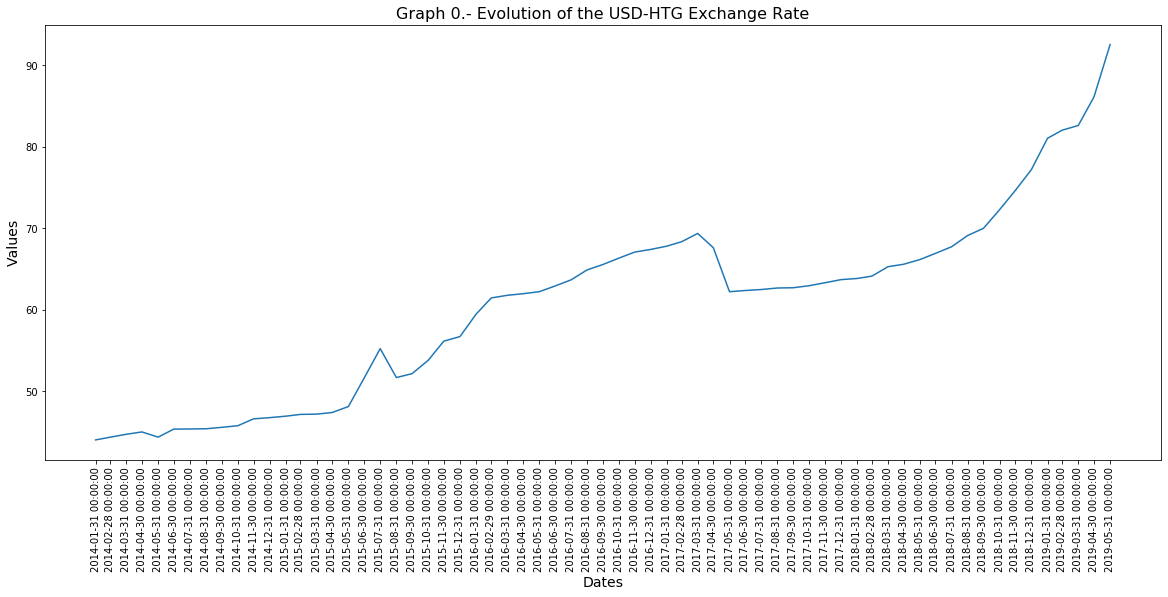

In [756]:
viz(dg[['end_rate']], (20,8), 1, 1, xlab='Dates', ylab='Values', 
    title=['Graph 0.- Evolution of the USD-HTG Exchange Rate'], 
    name='graphs/Evolution of the USD-HTG Exchange Rate')

As can be seen, the rates have gone beyond 50 gourdes after May 2015, but were still under control under Governor Castel's administration. Between May 2015 and March 2017, they kept increasing until they almost reached 70 HTG, and this was in the period of elections and unrests against Martelly's government. However the Central Bank seem to have regained control over the evolution of the rates, thanks to [economic policies](https://www.brh.ht/wp-content/uploads/2018/08/note_polmon4t15f.pdf) implemented under the governance of Charles Castel, which actually made the exchange rate drop substantially from around 70 HTG to staying around 60 HTG between April 2017 thru March 2018. Finally, under Jovenel Moïse's presidency and Jean Baden Dubois's governance, the dollar prices started spiking again from 70 HTG after March 2018 and have barely dropped since then.

### B. Bivariate Analysis

In [757]:
dg.head()

,end_rate,inf,rec_rem,us_imp_ht,us_exp_ht,int_reg_deb,int_reg_emb
date,,,,,,,
2014-01-31,44.0151,3.370787,1.339040e+08,44843398.0,98991983.0,44891.0,56478.0
2014-02-28,44.3479,3.210117,1.679772e+08,72252658.0,79821039.0,41446.0,41646.0
2014-03-31,44.7062,3.239845,1.965820e+08,67067495.0,128131695.0,52201.0,57193.0
2014-04-30,44.9934,3.469880,1.798655e+08,71276176.0,93306047.0,47486.0,51378.0
2014-05-31,44.3551,3.525682,1.712485e+08,76678909.0,128070198.0,42911.0,51720.0


#### 1. Exchange Rates & Inflation Rates

Inflation varies the same as the exchange rate, those series are very likely to be positively correlated. This is to say that the inflation tends to be high when the Exchange rate is high and vice versa. 

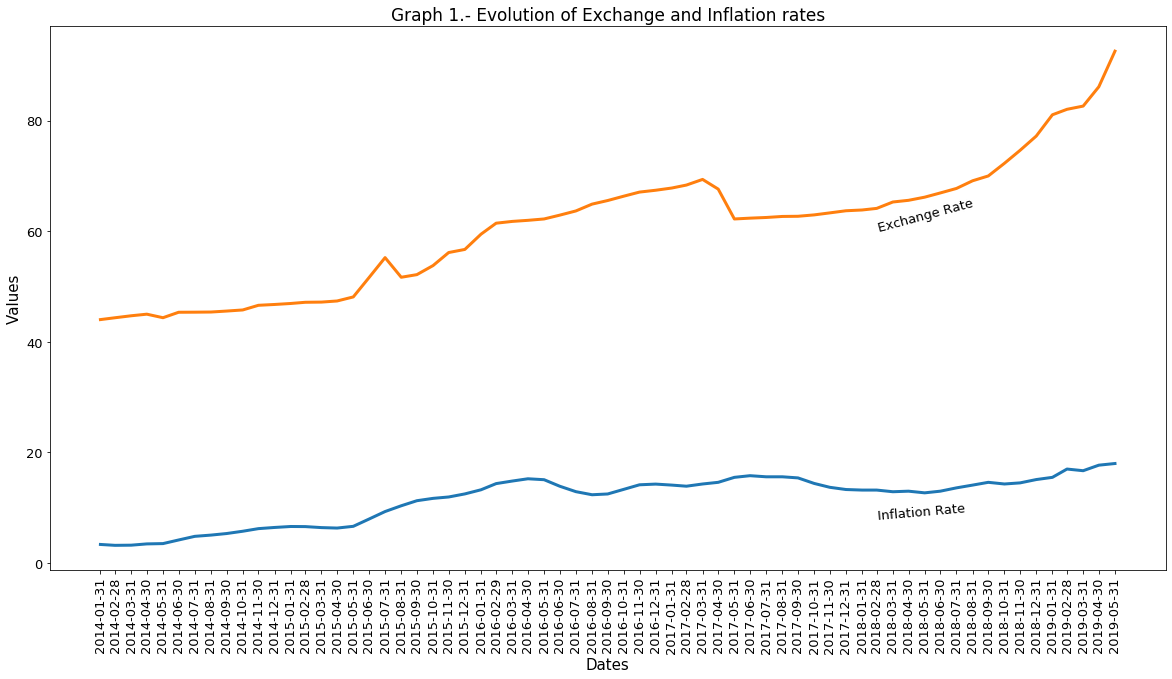

In [758]:
viz_stack()

#### _1.1.- Exchange Rates & Inflation Rates (at logarithmic scale)_

Although Graph 1.1 has reversed the position of the curves from Graph 1, the conclusion is still the same: the series are positively correlated, which means an increase in one is normally accompanied with an increase of different amplitude in the other.

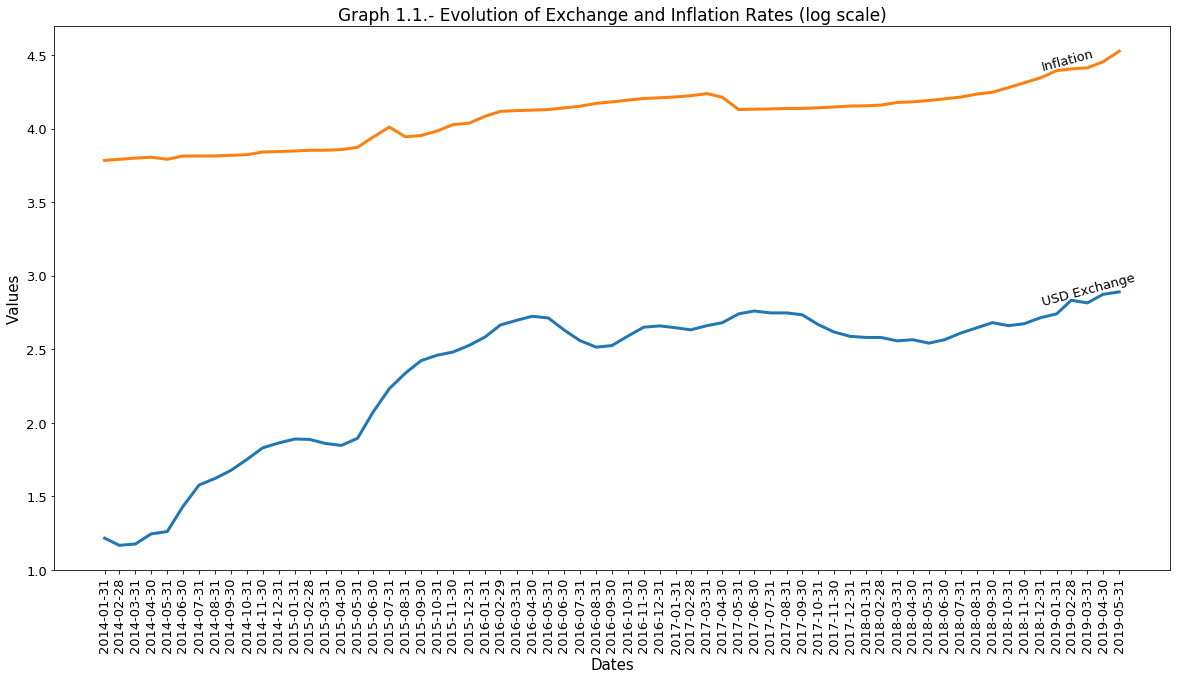

In [759]:
viz_stack(data=logdf, col1='inf', col2='end_rate', col3=None,
            x1='2018-12-31', x2='2018-12-31', x3='2018-02-28',
            y1=4.4, y2=2.8, y3=0,
            s1='Inflation', s2='USD Exchange', s3='',
            rot1=15, rot2=15, rot3=0,
            title='Graph 1.1.- Evolution of Exchange and Inflation Rates (log scale)', 
            name='graphs/log_end_rate-log_inf')

#### 2. Exchange Rates & International Trade

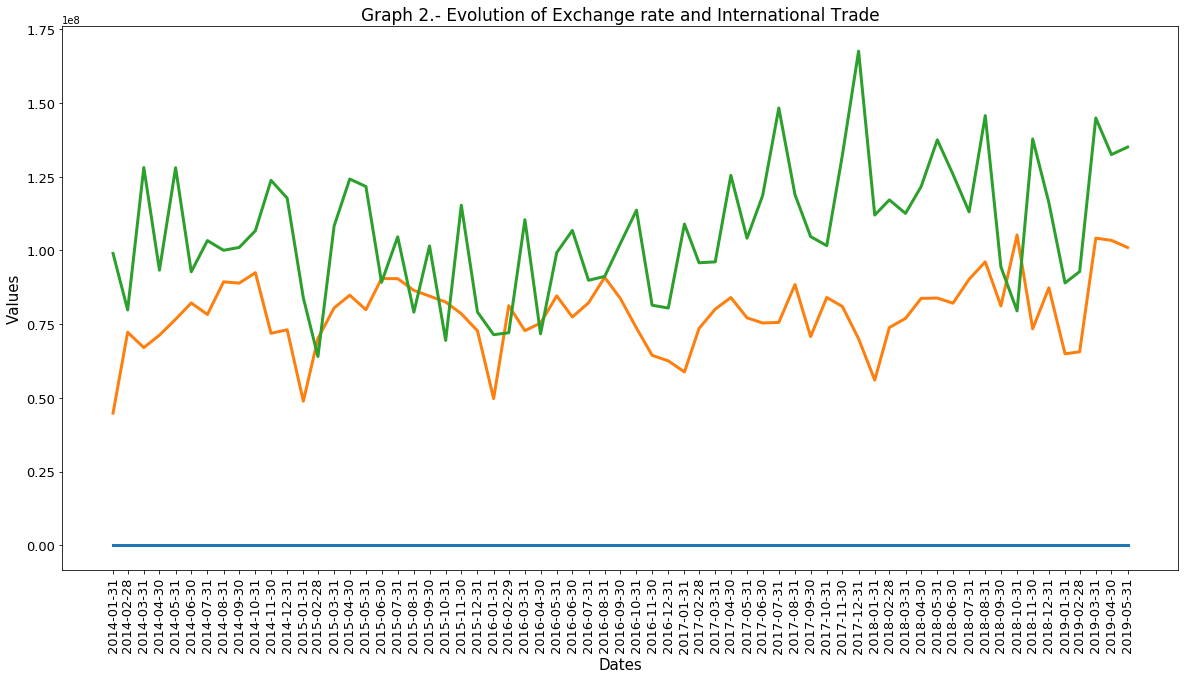

In [760]:
viz_stack(col1='us_imp_ht', col2='end_rate', col3='us_exp_ht',
            x1='2018-02-28', x2='2018-02-28', x3='2018-02-28',
            y1=60, y2=8, y3=0,
            s1='', s2='', s3='',
            rot1=15, rot2=5, rot3=0,
            title='Graph 2.- Evolution of Exchange rate and International Trade', 
            name='graphs/end_rate-imp-exp')

#### _2.1.- Exchange Rates & International Trade (at logarithmic scale)_

The Graph above doesn't give a proper grasp of how exchange rates vary relative to imports and exports, because `end_rate` is of the order of tens, whereas `us_imp_ht` and `us_exp_ht` are of the order of millions. Logaritmic-scaled data will be used instead: 

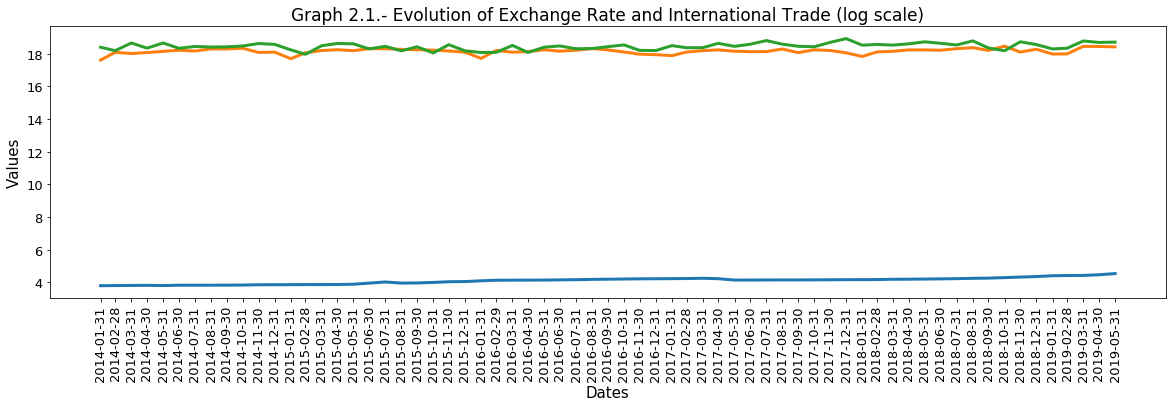

In [761]:
viz_stack(data=logdf, size=(20,5), col1='us_imp_ht', col2='end_rate', col3='us_exp_ht',
            x1='2018-02-28', x2='2018-02-28', x3='2018-02-28',
            y1=60, y2=8, y3=0,
            s1='', s2='', s3='',
            rot1=15, rot2=5, rot3=0,
            title='Graph 2.1.- Evolution of Exchange Rate and International Trade (log scale)', 
            name='graphs/log_end_rate-log_imp-log-exp')

Graph 2.1 is nothing more informative than Graph 2... Let's explore these variables on unstacked line graphs instead!

#### 3. Exchange Rates and International Trade (at level scale, unstacked)

Descriptives already showed that Haitians import more from their main and first partner and export less. But now Graphs 3.2, 3.3 and 3.4 are about to tell us four main things:


1. There is a preference in Haiti for importing goods that come from abroad.


2. There is a preference in Haiti for the US Dollar, compared to the Gourdes. 


3. Since the Demand for US Dollars doesn't seem to have an impact on the Amount of Goods Imported, one has reasons to wonder whether the US Dollar is not hoarded by major economic agents.


4. And also, since the Demand for US Dollars doesn't seem to have any impact on the Exchange Rate, one has reasons to believe that some major economic agents might be controlling variables or putting in place certain artificial strategies which might be causing the Exchange Rate to vary independently of the Market Forces.


The above will be clarified with examples in the analyses below.

#### _3.1.- Exchange Rates and US Exports to Haiti (Analysis of Haitian Imports from the US, at level scale)_

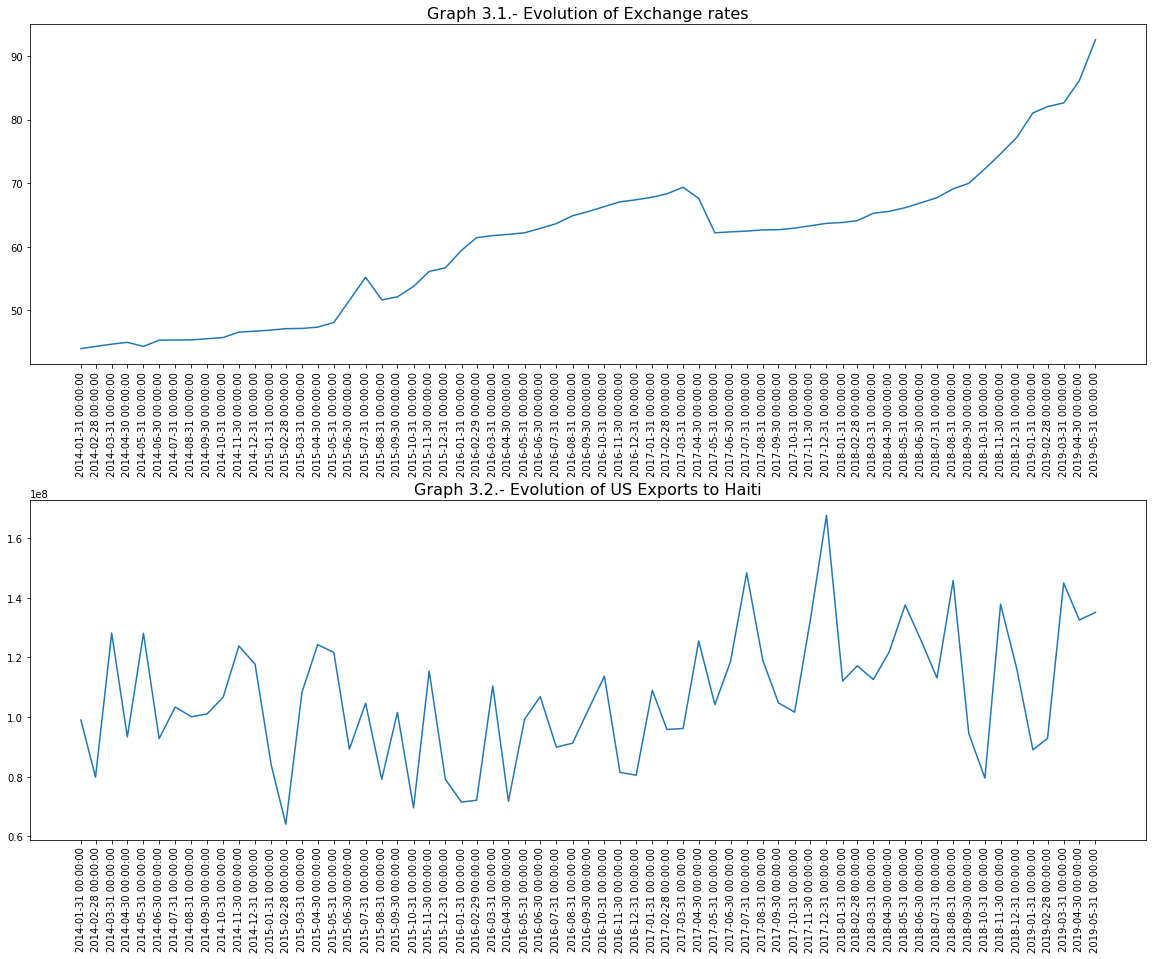

In [762]:
viz(dg[['end_rate', 'us_exp_ht']], (20,15), col=1, row=2, 
    title = ['Graph 3.1.- Evolution of Exchange rates', 
             'Graph 3.2.- Evolution of US Exports to Haiti'],
    name='graphs/end_rate-imp')

The USA exporting their products to Haiti, means Haitians are importing from the US. To do so, they need US dollars to buy US goods, which naturally impacts the demand for dollars. The more dollars importers need, the more scarce the dollar becomes, which makes its price in gourdes spike. However, this is not how it looks on the curve... 

+ For example, on the last day of February the Haitian imports from the US (same as the US Exports to Haiti) hit a historical low (about 60M USD). This means Haitian importers are not importing, so there should not be any Demand for the Dollar before this date. Nonetheless, the Exchange rate did not decrease: Graph 3.3 even indicate it had been slightly increasing, remaining less than 50 HTG, over the three last month before this drop. Should this effect of increase be imputed to agents hoarding large amounts of dollars? 


+ Another example is when the Imports from the US reached a historical high in December 2017 (160M USD). This means Haitian importers are importing, so there had to be a huge Demand for Dollars in the late months, which should've made the Exchange Rate spike dramatically. Nevertheless, what we observe is just a slight increase from May 2017 to December 2020, remaining less than 65 HTG. How come that huge Demand for US Dollars hasn't affected at all the Exchange Rate? 


+ And finally, from January 2018 thru May 2019, the Imports from the US can be approximated by a negative trend, meaning a low demand for US Dollars over the period. But still, the Exchange Rate has kept augmenting exponentially. Now why is the Dollar scarce and expensive in Haiti when the Demand for Dollars is not believe to have increased? 

It is possible that something other than the Haitian imports or a group of agents other than the Haitian importers are actually causing the exchange rate to spike at will. That something or someone is technically called a variable. Unfortunately, this study cannot determine such a variable, neither explore its characteristics.

#### _3.2.- Exchange Rates and US Imports from Haiti (Analysis of Haitian Exports to the US, at level scale)_

The first thing to note is the seasonality in the US Imports. A seasonality is a regularity that happens at the very same period of each period group. For example, the USA imports drops dramatically in January of every year, sometimes down to 20M USD.

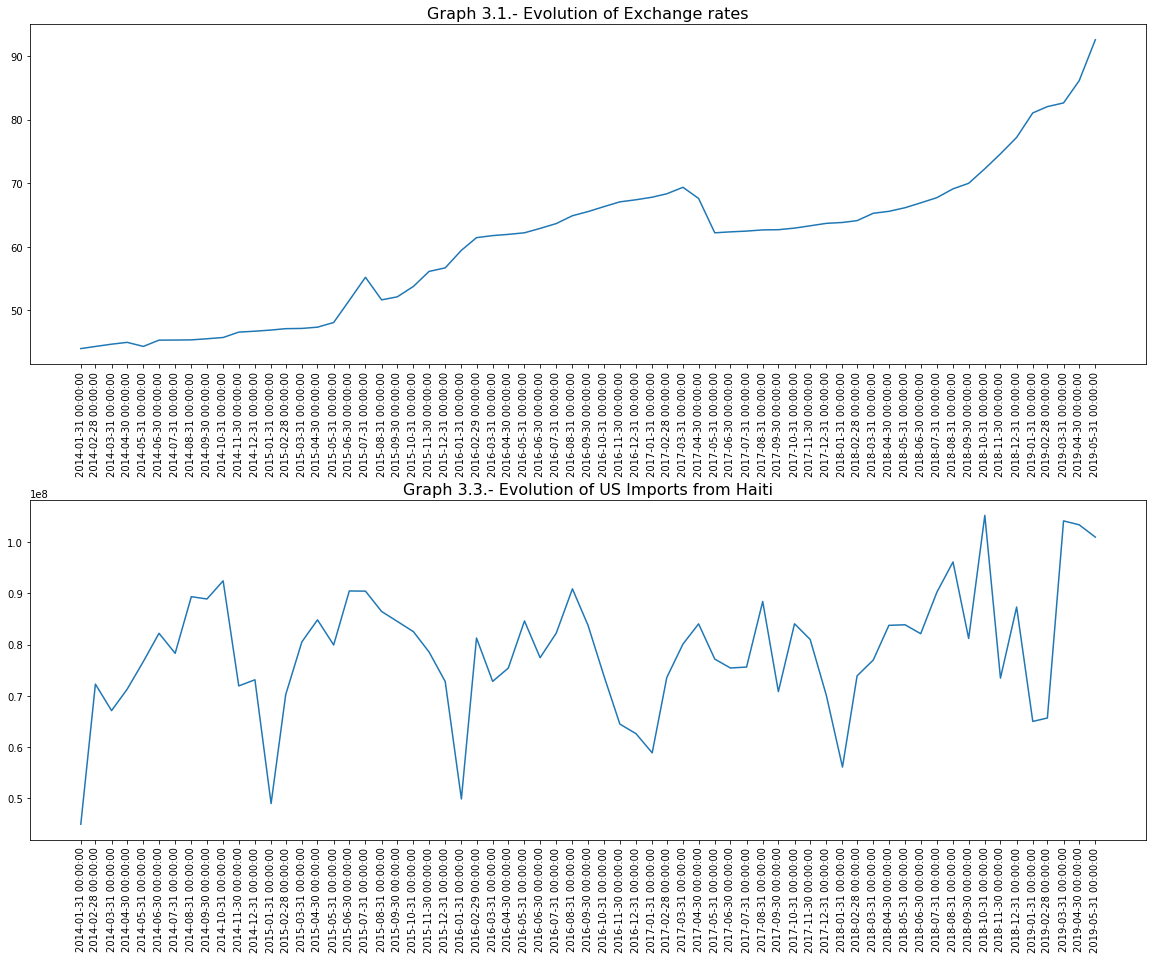

In [763]:
viz(dg[['end_rate', 'us_imp_ht']], (20,15), col=1, row=2, 
    title = ['Graph 3.1.- Evolution of Exchange rates', 
             'Graph 3.3.- Evolution of US Imports from Haiti'],
    name='graphs/end_rate-exp')

Moreover, the USA importing from Haiti, means Haitians are exporting their products to the USA. In doing so, US dollars is finding their way inside our economy, which naturally impacts the demand for dollars (negatively). The more dollars exporters get from selling their goods to the Americans, the less scarce the dollar becomes, which should make its price in gourdes go down. Let's take the same examples as with the exports and see if this gain could explain the anomalies we saw earlier...

+ On the last day of February 2015, the Haitian exports got up to (70M USD) from a low in January (50M USD, Graph 3.4). So in March 2015, more dollars have entered the economy. The following month should see the imports increase, since Haitians have more dollars in their pockets. Graph 3.3 effectively shows a sustained increase in the value of imported goods during the three months following February 2015. 


+ On the last day of December 2017, there was a drop in the Haitian exports compared to November 2016 (Graph 3.4). So, the Haitian exporters had fewer dollars in their pocket on the first day of January 2018 than they had at the end of December 2018. This means the Imports over the first months of 2018 should be dropping. Effectively, Graph 3.3 shows a dramatic drop in Imports in January 2018 (from 160M to 110M USD).


Graph 3.1, 3.2 and 3.3 show that the US Imports from Haiti seem to be fairly consistant with the market forces. However, because the US Imports seem to be positively correlated with the Exchange Rate, Graph 3.2 and 3.3 also give more reasons to believe that the market forces are being overriden by some major agents in the economy.

#### 4. Exchange Rates & Received Remittances